#  #2 Data  Cleaning & PreProcessing

# In this notebook I will :-
- Handle missing values
- Fix data types(especially dates)
- Remove duplicates
- Create new useful columns
- Handle Outliers

In [35]:
# Importing Libraries
import pandas as pd
import numpy as np


In [36]:
#  1. Importing the dataset
df = pd.read_csv(r"C:\Users\ASUS\Desktop\FINAL PROJECT FOR PLACEMENT\Retail_EDA_project\data\retail_sales.csv")
print("Initial shape of the data :- ", df.shape)

Initial shape of the data :-  (1000, 13)


In [37]:
# 2.Handle Missing Values
#  Checking for missing values
df.isnull().sum()

# here i found that review_score and gender columns have missing values
#  For review_score :- i fill the mean/median of (same row)
#  For gender :- i fill it with the mode of that column

# Filling missing values
df['review_score']=df['review_score'].fillna(df['review_score'].median())
df['gender']=df['gender'].fillna(df['gender'].mode()[0])

#  Missing values after filling
df.isnull().sum() 
# output is 0 now

customer_id       0
order_date        0
product_id        0
category_id       0
category_name     0
product_name      0
quantity          0
price             0
payment_method    0
city              0
review_score      0
gender            0
age               0
dtype: int64

In [38]:
# 3. Remove Duplicates
print("Duplicates before :",df.duplicated().sum())

# Dropping duplicates
df.drop_duplicates()

print("Duplicates after :",df.duplicated().sum())

Duplicates before : 0
Duplicates after : 0


In [39]:
#  4 Fixing Data types

# Here I convert order_date to datetime
df['order_date']=pd.to_datetime(df['order_date'])

# Verifying conversion of order_date column
df.dtypes

customer_id                int64
order_date        datetime64[ns]
product_id                 int64
category_id                int64
category_name             object
product_name              object
quantity                   int64
price                    float64
payment_method            object
city                      object
review_score             float64
gender                    object
age                        int64
dtype: object

In [40]:
# 5 Creating new usefull columns from dateset

# Here I see columns which are quantity and price ,so by help of these two column i create new column called total_sales.
df['total_sales']=df['quantity']*df['price']

# Now by help of order_date column , i create new columns
df['year']=df['order_date'].dt.year
df['month']=df['order_date'].dt.month
df['day']=df['order_date'].dt.day
df['day_name']=df['order_date'].dt.day_name()

#  Checking new columns
df.head()


,customer_id,order_date,product_id,category_id,category_name,product_name,quantity,price,payment_method,city,review_score,gender,age,total_sales,year,month,day,day_name
0,13542,2024-12-17,784,10,Electronics,Smartphone,2,373.36,Credit Card,New Oliviaberg,1.0,F,56,746.72,2024,12,17,Tuesday
1,23188,2024-06-01,682,50,Sports & Outdoors,Soccer Ball,5,299.34,Credit Card,Port Matthew,4.0,M,59,1496.70,2024,6,1,Saturday
2,55098,2025-02-04,684,50,Sports & Outdoors,Tent,5,23.00,Credit Card,West Sarah,5.0,F,64,115.00,2025,2,4,Tuesday
3,65208,2024-10-28,204,40,Books & Stationery,Story Book,2,230.11,Bank Transfer,Hernandezburgh,5.0,M,34,460.22,2024,10,28,Monday
4,63872,2024-05-10,202,20,Fashion,Skirt,4,176.72,Credit Card,Jenkinshaven,1.0,F,33,706.88,2024,5,10,Friday


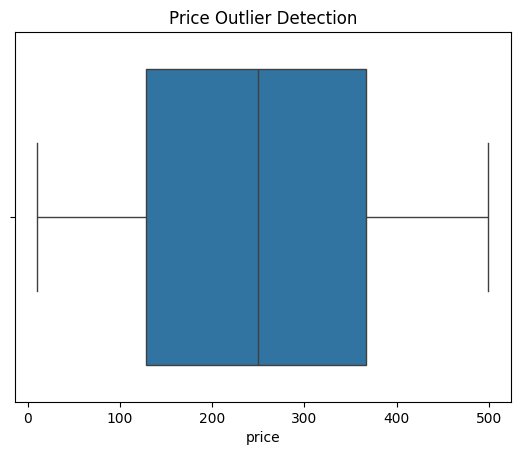

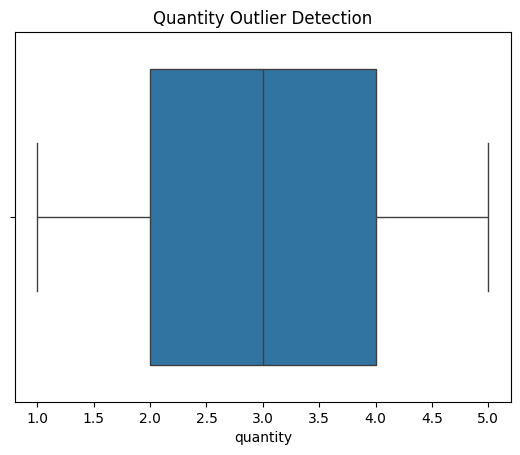

In [41]:
#  6. Handling Outliers

import matplotlib.pyplot as plt
import seaborn as sns

# Now I handle outliers of quantity and price column of dataset with help of boxplot

# Visualizing Price Distribution
sns.boxplot(x=df['price'])
plt.title('Price Outlier Detection')
plt.show()

# Visualizing Quantity Distribution
sns.boxplot(x=df['quantity'])
plt.title('Quantity Outlier Detection')
plt.show()

# Looking on plot, I find that both have noo such outliers 
#  but also i perform some outlier removal for better result

# Here I remove rows where price and quantity are below <=0
df=df[(df['quantity']>0) & (df['price'] >0)]

In [ ]:
#  7 Final Clean Data Shape
print('Final Cleaned Data Shape:- ',df.shape)

Final Cleaned Data Shape:-  (1000, 18)


In [49]:
# 8 Save New Cleaned Dataset
import os
os.makedirs("data", exist_ok=True)  # Creates 'data' folder if it doesn't exist

df.to_csv(r"C:\Users\ASUS\Desktop\FINAL PROJECT FOR PLACEMENT\Retail_EDA_project\data\retail_sales_cleaned.csv", index=False)
print("New cleaned dataset saved as retail_sales_cleaned.csv")

New cleaned dataset saved as retail_sales_cleaned.csv
